<h1 style="text-align: center;">Pendekatan Numerik untuk Persamaan Schrodinger</h1>
<h3 style="text-align: center;">Fadjar Fathurrahman</h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
%matplotlib inline

In [157]:
import matplotlib
matplotlib.style.use("ggplot")
#matplotlib.style.use("dark_background")
#matplotlib.style.use("default")

In [147]:
matplotlib.style.available

['seaborn-poster',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-white',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-muted',
 'tableau-colorblind10',
 'seaborn-deep',
 'seaborn-pastel',
 'seaborn-colorblind',
 'bmh',
 '_classic_test',
 'fast',
 'ggplot',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-dark',
 'classic',
 'Solarize_Light2',
 'grayscale',
 'seaborn-bright',
 'seaborn',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-darkgrid']

In [5]:
import scipy.linalg

# Solusi keadaan terikat untuk osilator dengan menggunakan metode variasional

Persamaan Schrodinger:
$$
\left[ -\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2} - V(x) \right] \psi(x) =
E\psi(x)
$$
dengan:
$$
V(x) = \frac{1}{2}m \omega^2 x^2
$$
di mana $m$ adalah massa partikel dan $\omega$ adalah frekuensi osilator.

Fungsi basis Gaussian:
$$
\phi_{i}(x) = \left(\frac{\nu_{i}}{\pi}\right)^{\frac{1}{2}}
\mathrm{e}^{-\nu_{i}(x-s_{i})^2}
$$

In [7]:
def eval_gaussian_basis(ν, s, x):
    return (ν/np.pi)**0.5 * np.exp(-ν*(x-s)**2)

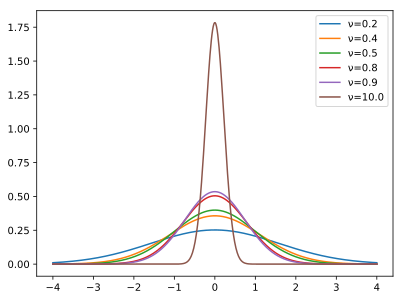

In [10]:
NptsPlt = 500
x = np.linspace(-4.0, 4.0, NptsPlt)
ν_s = [0.2, 0.4, 0.5, 0.8, 0.9, 10.0]
s0 = 0.0
plt.clf()
for ν in ν_s:
    plt.plot(x, eval_gaussian_basis(ν, s0, x), label="ν="+str(ν))
plt.legend();

In [ ]:
# Gunakan Gaussian 1D dengan titik pusat yang berbeda-beda
N = 101
ν = 1.0
H = np.zeros((N,N))
S = np.zeros((N,N))
    
centers = np.zeros(N)
for i in range(N):
    centers[i] = -25.0 + i*0.5

In [50]:
# Gunakan Gaussian 1D dengan titik pusat yang berbeda-beda
N = 101
ν = 0.5
H = np.zeros((N,N))
S = np.zeros((N,N))
ω = 1.0
    
centers = np.zeros(N)
for i in range(N):
    centers[i] = -25.0 + i*0.5

for i in range(N):
    for j in range(N):
        ss = (centers[i] - centers[j])**2
        S[i,j] = np.exp(-0.5*ν*ss)
        kin = 0.5*np.exp(-0.5*ν*ss)*ν*(1.0 - ν*ss)
        pot = ω**2 * 0.5*np.exp(-0.5*ν*ss)*0.25*(1.0/ν + (centers[i] + centers[j])**2)
        H[i,j] = kin + pot

In [51]:
evals, evecs = scipy.linalg.eigh(H, S)

In [53]:
evals[0:5]

array([0.5, 1.5, 2.5, 3.5, 4.5])

In [41]:
NptsPlt = 1000
A = -25.0
B =  25.0
xplt = np.linspace(A, B, NptsPlt)
yplt = np.zeros(NptsPlt)
for i in range(N):
    yplt[:] = yplt[:] + evecs[i,2]*eval_gaussian_basis(ν, centers[i], xplt)

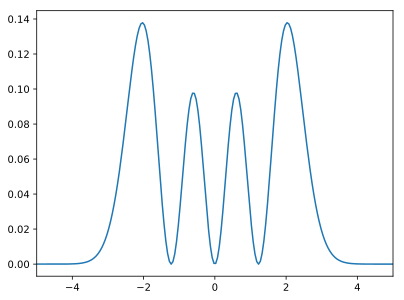

In [54]:
plt.clf()
plt.plot(xplt, yplt*yplt)
plt.xlim(-5,5);

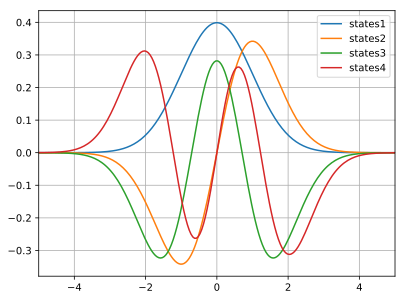

In [55]:
NptsPlt = 1000
A = -25.0
B =  25.0
xplt = np.linspace(A, B, NptsPlt)

plt.clf()
states = [0, 1, 2, 3]
for ist in states:
    yplt = np.zeros(NptsPlt)
    for i in range(N):
        yplt[:] = yplt[:] + evecs[i,ist]*eval_gaussian_basis(ν, centers[i], xplt)
    plt.plot(xplt, yplt, label="states"+str(ist+1))
plt.xlim(-5,5)
plt.legend()
plt.grid();

In [41]:
import sympy

In [50]:
x = sympy.symbols("x", real=True)
nu = sympy.symbols("nu", real=True, positive=True)
s = sympy.symbols("s", real=True)
g1 = (nu/sympy.pi)*sympy.exp(-nu*(x - s)**2)

In [51]:
sympy.integrate(g1*g1,(x,-sympy.oo,sympy.oo))

sqrt(2)*nu**(3/2)/(2*pi**(3/2))

# Metode grid

In [29]:
N = 201
Hamiltonian = np.zeros( (N,N) )

A = -10.0
B = 10.0
h = (B-A)/(N-1)

print("h = ", h)

x = np.zeros(N)
for i in range(N):
    x[i] = A + i*h
    
w = 0.5/h**2

omega = np.sqrt(2.0)
for i in range(N):
    Hamiltonian[i,i] = 2.0*w + 0.5 * omega**2 * x[i]**2  # Diagonal element
    if i != N-1:
        Hamiltonian[i,i+1] = -w
        Hamiltonian[i+1,i] = -w


h =  0.1


In [30]:
evals, evecs = scipy.linalg.eigh(Hamiltonian)

In [31]:
evals[0:6]

array([0.70648123, 2.11819035, 3.52738945, 4.93407178, 6.33823052,
       7.73985882])

In [20]:
Vpot = 0.5 * omega**2 * x**2

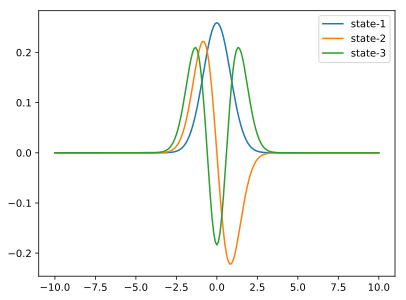

In [32]:
plt.clf()
for i in range(3):
    plt.plot(x, evecs[:,i], label="state-"+str(i+1))
plt.legend()

In [49]:
def Vpot(x):
    return -np.exp(-1.0*(x + 2.5)**2) - np.exp(-1.0*(x - 2.5)**2) 

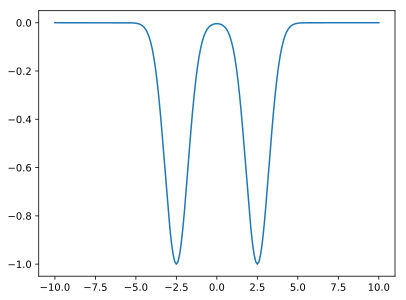

In [50]:
plt.clf()
plt.plot(x, Vpot(x))

In [51]:
N = 201
Hamiltonian = np.zeros( (N,N) )

A = -10.0
B = 10.0
h = (B-A)/(N-1)

print("h = ", h)

x = np.zeros(N)
for i in range(N):
    x[i] = A + i*h
    
w = 0.5/h**2

for i in range(N):
    Hamiltonian[i,i] = 2.0*w + Vpot(x[i])  # Diagonal element
    if i != N-1:
        Hamiltonian[i,i+1] = -w
        Hamiltonian[i+1,i] = -w

h =  0.1


In [52]:
evals, evecs = scipy.linalg.eigh(Hamiltonian)

In [53]:
evals[0:5]

array([-0.48933372, -0.4652595 ,  0.05398789,  0.08813081,  0.18493574])

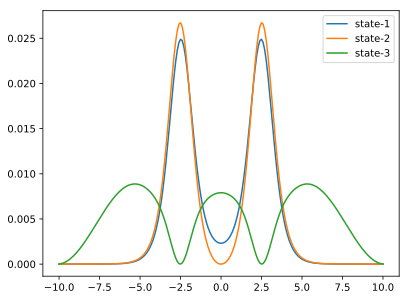

In [55]:
plt.clf()
for i in range(3):
    plt.plot(x, evecs[:,i]*evecs[:,i], label="state-"+str(i+1))
plt.legend()

# Potensial periodik

In [58]:
N = 400
A = 0.0
B = 5.0
L = B - A
v0 = 1.5

h = (B-A)/N
x = np.zeros(N)
for i in range(N):
    x[i] = i*h

k = 0.0

Matriks turunan kedua dan turunan pertama

In [7]:
def build_d2_dx2_matrix(N, h, k):
    mat = np.zeros( (N,N) )
    for i in range(N):
        mat[i,i] = -2.0/h**2
        if i != N-1:
            mat[i,i+1] = 1/h**2
            mat[i+1,i] = mat[i,i+1]
    mat[0,N-1] = 1/h**2
    mat[N-1,0] = 1/h**2
    return mat

In [38]:
def build_d_dx_matrix(N, h, k):
    mat = np.zeros( (N,N) )
    for i in range(N):
        if i != N-1:
            mat[i,i+1] = 1.0/(2*h)
            mat[i+1,i] = -mat[i,i+1]
    mat[0,N-1] = -1.0/(2*h)
    mat[N-1,0] = 1.0/(2*h)
    return mat

In [44]:
D2x = build_d2_dx2_matrix(N, h, k)
D1x = build_d_dx_matrix(N, h, k)

In [149]:
v = np.sin(2*np.pi*x/L)
d1v_analitik = 2*np.pi/L * np.cos(2*np.pi*x/L)
d2v_analitik = -(2*np.pi/L)**2 * np.sin(2*np.pi*x/L)

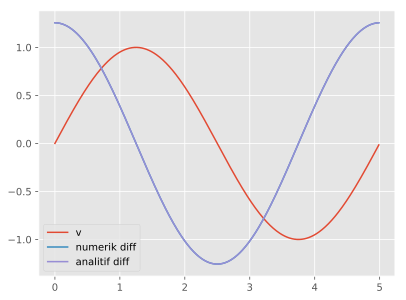

In [158]:
plt.clf()
plt.plot(x, v, label="v")
plt.plot(x, np.matmul(D1x, v), label="numerik diff")
plt.plot(x, d1v_analitik, label="analitif diff")
plt.legend();

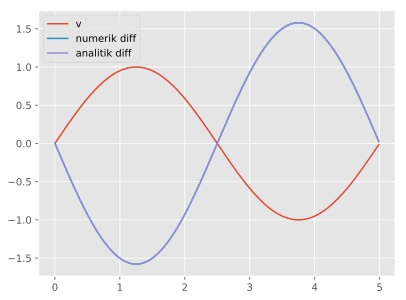

In [159]:
plt.clf()
plt.plot(x, v, label="v")
plt.plot(x, np.matmul(D2x, v), label="numerik diff")
plt.plot(x, d2v_analitik, label="analitik diff")
plt.legend();

In [80]:
Ham = -0.5*( D2x + 2j*k*D1x - k**2 * np.eye(N) ) 

In [81]:
evals, evecs = scipy.linalg.eigh(Ham)

In [82]:
evals[:3]

array([0.04941296, 0.44452181, 1.23370055])

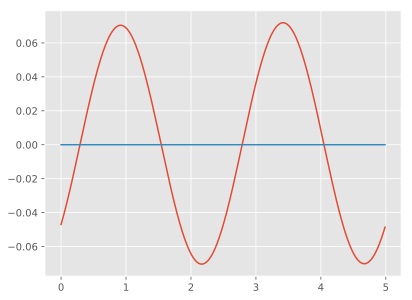

In [160]:
plt.clf()
plt.plot( x, np.real(evecs[:,3]), label="real part" )
plt.plot( x, np.imag(evecs[:,3]), label="imag part" )

e0 =       0.1973920880 e0 analitik =       0.1973920880
e0 =       0.1819165483 e0 analitik =       0.1819165483
e0 =       0.1670726633 e0 analitik =       0.1670726633
e0 =       0.1528604330 e0 analitik =       0.1528604330
e0 =       0.1392798573 e0 analitik =       0.1392798573
e0 =       0.1263309363 e0 analitik =       0.1263309363
e0 =       0.1140136700 e0 analitik =       0.1140136700
e0 =       0.1023280584 e0 analitik =       0.1023280584
e0 =       0.0912741015 e0 analitik =       0.0912741015
e0 =       0.0808517993 e0 analitik =       0.0808517993
e0 =       0.0710611517 e0 analitik =       0.0710611517
e0 =       0.0619021588 e0 analitik =       0.0619021588
e0 =       0.0533748206 e0 analitik =       0.0533748206
e0 =       0.0454791371 e0 analitik =       0.0454791371
e0 =       0.0382151082 e0 analitik =       0.0382151082
e0 =       0.0315827341 e0 analitik =       0.0315827341
e0 =       0.0255820146 e0 analitik =       0.0255820146
e0 =       0.0202129498 e0 anal

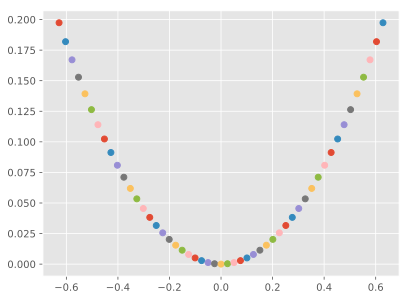

In [161]:
Nk = 51
k_array = np.linspace(-np.pi/L, np.pi/L, Nk)
ebands = np.zeros( (N,Nk) )
Nstates = 5
plt.clf()
for i in range(Nk):
    k = k_array[i]
    Ham = -0.5*( D2x + 2j*k*D1x - k**2 * np.eye(N) )
    evals, evecs = scipy.linalg.eigh(Ham)
    e0 = evals[0]
    e0_analitik = 0.5*k**2
    print("e0 = %18.10f e0 analitik = %18.10f" % (e0, e0_analitik))
    plt.plot([k], [evals[0]], marker="o")
    ebands[:,i] = evals[:]

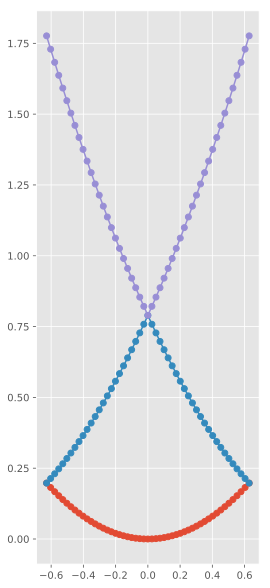

In [162]:
plt.clf()
fig = plt.gcf()
fig.set_size_inches(4,10)
plt.plot(k_array, ebands[0,:], marker="o")
plt.plot(k_array, ebands[1,:], marker="o")
plt.plot(k_array, ebands[2,:], marker="o")

Tambah potensial:

In [163]:
Vpot = np.zeros(N)
for i in range(N):
    if x[i] > 1.25 and x[i] < 3.75:
        Vpot[i] = -1e-3

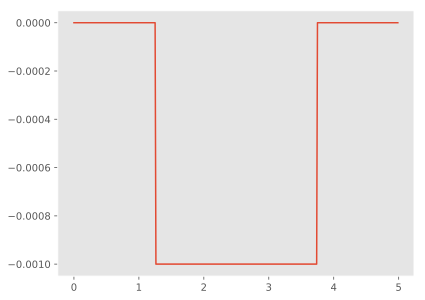

In [164]:
plt.clf()
plt.plot(x, Vpot)
plt.grid();

In [165]:
Nk = 51
k_array = np.linspace(-np.pi/L, np.pi/L, Nk)
ebands = np.zeros( (N,Nk) )
for i in range(Nk):
    k = k_array[i]
    Ham = -0.5*( D2x + 2j*k*D1x - k**2 * np.eye(N) ) + Vpot
    evals, evecs = scipy.linalg.eigh(Ham)
    ebands[:,i] = evals[:]

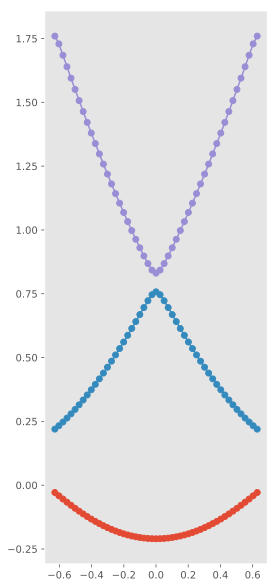

In [166]:
plt.clf()
fig = plt.gcf()
fig.set_size_inches(4,10)
plt.plot(k_array, ebands[0,:], marker="o")
plt.plot(k_array, ebands[1,:], marker="o")
plt.plot(k_array, ebands[2,:], marker="o")
plt.grid();

In [132]:
k = 0.0
Ham = -0.5*( D2x + 2j*k*D1x - k**2 * np.eye(N) ) + Vpot
evals, evecs = scipy.linalg.eigh(Ham)

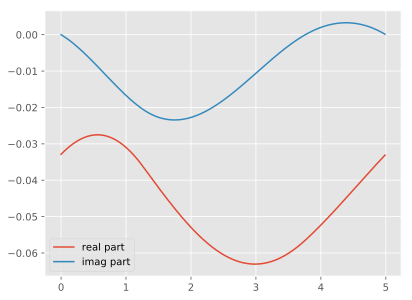

In [167]:
plt.clf()
plt.plot(x, np.real(evecs[:,0]), label="real part")
plt.plot(x, np.imag(evecs[:,0]), label="imag part")
plt.legend();

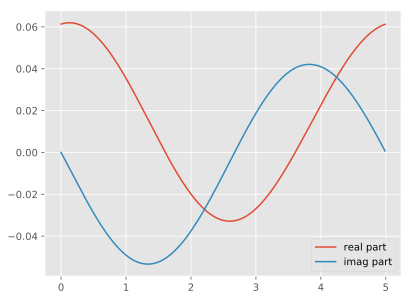

In [168]:
plt.clf()
plt.plot(x, np.real(evecs[:,1]), label="real part")
plt.plot(x, np.imag(evecs[:,1]), label="imag part")
plt.legend();

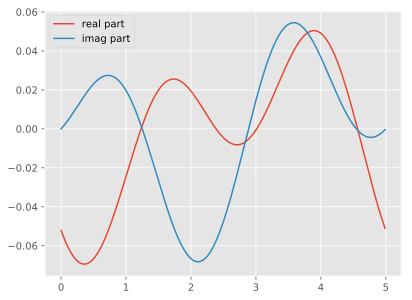

In [169]:
plt.clf()
plt.plot(x, np.real(evecs[:,2]), label="real part")
plt.plot(x, np.imag(evecs[:,2]), label="imag part")
plt.legend();

# Periodic (old stuffs)

In [28]:
H1 = build_Hamiltonian_v1(N, h, k)

L = B - A
vv = np.zeros(N)
# Potensial Mathieu
for i in range(N):
    H1[i,i] = H1[i,i] + v0*(1.0 + np.cos(2*np.pi*x[i]/L))

In [21]:
evals, evecs = scipy.linalg.eigh(H1)

In [29]:
evals[0:2]

array([0.71547629, 2.02606433])

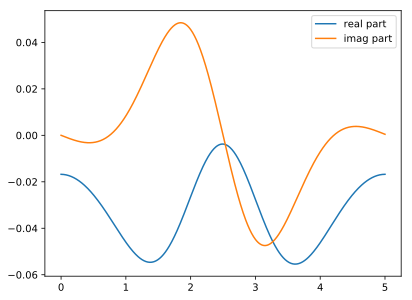

In [23]:
plt.clf()
plt.plot(x, np.real(evecs[:,1]), label="real part" )
plt.plot(x, np.imag(evecs[:,1]), label="imag part" )
plt.legend()

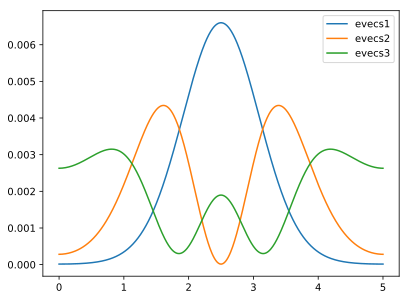

In [25]:
plt.clf()
for istates in range(3):
    plt.plot(x, np.real( evecs[:,istates]*np.conj(evecs[:,istates]) ), label="evecs"+str(istates+1) )
plt.legend()

In [ ]:
np.real( evecs[:,0]*np.conj(evecs[:,0]) )

In [32]:
N = 401

A = 0.0
B = 5.0

v0 = 1.5

h = (B-A)/(N-1)
x = np.zeros(N)
for i in range(N):
    x[i] = i*h
    
Hamiltonian = np.zeros((N,N))
w = 0.5/hh**2

for i in range(N):
    Hamiltonian[i,i] = 2.0*w
    if i != N-1:
        Hamiltonian[i,i+1] = -w
        Hamiltonian[i+1,i] = -w
Hamiltonian[0,N-1] = -w
Hamiltonian[N-1,0] = -w

L = B - A

vv = np.zeros(N)

# Kronig-Penney potential
for i in range(N):
    if x[i] < 0.25*L:
        Hamiltonian[i,i] = Hamiltonian[i,i] + v0
    if x[i] > 0.75*L:
        Hamiltonian[i,i] = Hamiltonian[i,i] + v0
    #if (x[i] < 0.25*L) or (x[i] > 0.75*L):
    #    vv[i] = v0
        
evals, evecs = scipy.linalg.eigh(Hamiltonian)

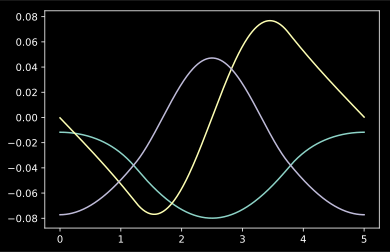

In [33]:
plt.clf()
plt.plot(x, evecs[:,0])
plt.plot(x, evecs[:,1])
plt.plot(x, evecs[:,2])

In [34]:
print(evals[0:6])

[0.34840553 1.36362859 1.87812318 3.85090595 4.01460395 7.79746204]


## Potensial Mathieu

In [35]:
N = 401

A = 0.0
B = 5.0

v0 = 1.5

hh = (B-A)/(N-1)
x = np.zeros(N)
for i in range(N):
    x[i] = i*hh
    
Hamiltonian = np.zeros((N,N))
w = 0.5/hh**2

for i in range(N):
    Hamiltonian[i,i] = 2.0*w
    if i != N-1:
        Hamiltonian[i,i+1] = -w
        Hamiltonian[i+1,i] = -w
Hamiltonian[0,N-1] = -w
Hamiltonian[N-1,0] = -w

L = B - A

vv = np.zeros(N)

# Potensial Mathieu
for i in range(N):
    Hamiltonian[i,i] = Hamiltonian[i,i] + v0*(1.0 + np.cos(2*np.pi*x[i]/L))
        
evals, evecs = scipy.linalg.eigh(Hamiltonian)

In [36]:
print(evals[0:6])

[0.71371452 2.06422868 2.81989674 4.72883163 4.76025445 8.61420375]


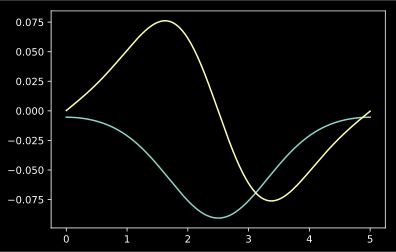

In [38]:
plt.clf()
plt.plot(x, evecs[:,0])
plt.plot(x, evecs[:,1])